In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/swang/Python/Feedback Analysis/yelp_labelled.txt', header=None, delimiter='\t')

In [3]:
df.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.columns = ['review', 'positive']

In [5]:
df.tail()

,review,positive
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [53]:
keywords = ['bad', 'not', 'worst', 'terrible', 'horrible', 'didn\'t', 'slow', 'avoid']
for key in keywords:
    df[str(key)] = df.review.str.contains(
        ' ' + str(key) + ' ',
        case= False
    )

In [22]:
print(df['bad'].value_counts())

False    991
True       9
Name: bad, dtype: int64


In [14]:
print(df['not'].value_counts())

False    899
True     101
Name: not, dtype: int64


In [15]:
print(df['worst'].value_counts())

False    991
True       9
Name: worst, dtype: int64


In [23]:
print(df['terrible'].value_counts())

False    997
True       3
Name: terrible, dtype: int64


In [27]:
print(df['horrible'].value_counts())

False    997
True       3
Name: horrible, dtype: int64


In [38]:
print(df['didn\'t'].value_counts())

False    987
True      13
Name: didn't, dtype: int64


In [48]:
print(df['slow'].value_counts())

False    994
True       6
Name: slow, dtype: int64


In [50]:
print(df['avoid'].value_counts())

False    997
True       3
Name: avoid, dtype: int64


In [60]:
dfnew=df.drop('review', axis=1)

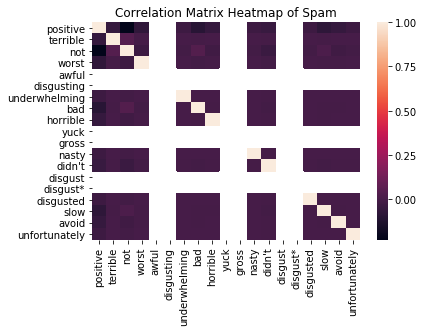

In [63]:
sns.heatmap(df.corr())
plt.title('Correlation Matrix Heatmap of Spam')
plt.show()

In [66]:
df['negative'] = not df.bool(['positive'])

TypeError: bool() takes 1 positional argument but 2 were given

In [67]:


# SKLearn asks that you specify inputs (data) and outcomes (target).
data = df[keywords]
target = df['positive']

# You can use the Bernoulli classifier for boolean data
from sklearn.naive_bayes import BernoulliNB

# Initiate/Instantiate? model and store it in the bnb model
bnb = BernoulliNB()

# fit the bnb/Bernoulli model to our spam data
# remember, data is our input, and target is our outcome
bnb.fit(data, target)
# does this change bnb?

# Store predicted data into a new variable. 
# (input data, get y_pred using our fitted model)
y_pred = bnb.predict(data)

# could also have been written as
# y_pred = bnb.fit(data, target).predict(data)

# Displaying the results
print('Number of mislabeled points out of a total {} points : {}'.
      format(data.shape[0],
      (target != y_pred).sum()
        ))

Number of mislabeled points out of a total 1000 points : 399


This isn't very accurate. I think for a few reasons.. not enough keywords, and not enough reviews.